In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as datetime
import sys
from normalize_data import getNormalizedDataset

In [35]:
df = getNormalizedDataset()
df.shape
df.isnull().sum()

(230396, 18)
(230060, 18)
(230041, 18)
(220417, 19)


titulo                        4900
descripcion                   1437
tipodepropiedad                  0
ciudad                           0
provincia                        0
antiguedad                       0
habitaciones                     0
garages                          0
banos                            0
metroscubiertos                  0
metrostotales                    0
fecha                            0
gimnasio                         0
usosmultiples                    0
piscina                          0
escuelascercanas                 0
centroscomercialescercanos       0
precio                           0
precio_m2                        0
precio_dolar                     0
extras                           0
dtype: int64

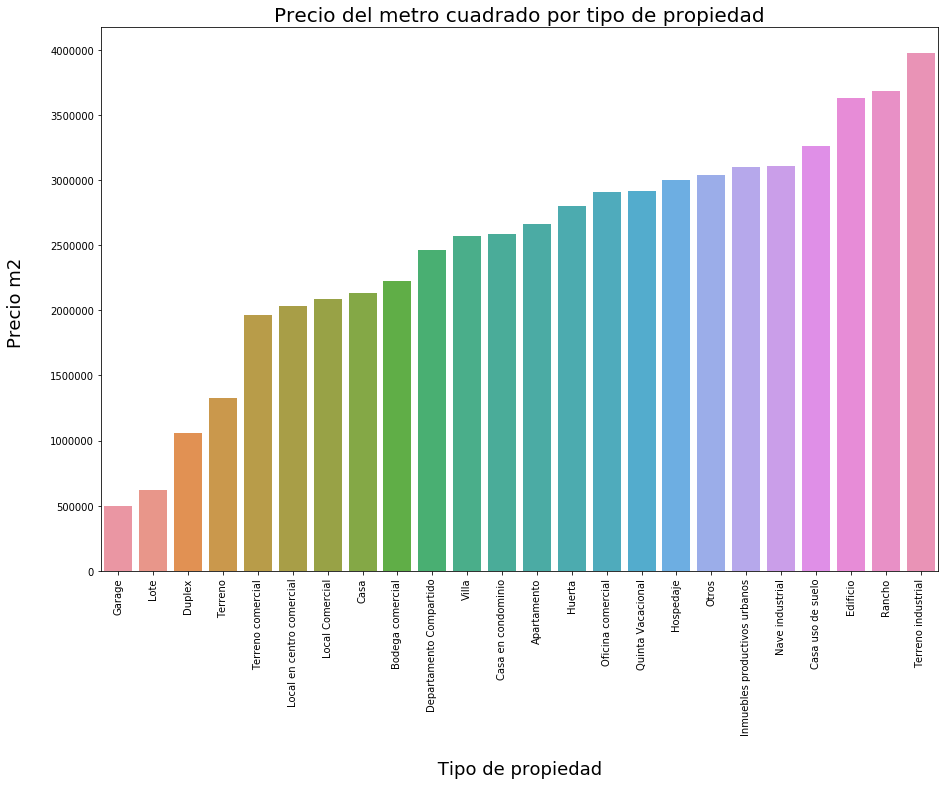

In [3]:
plt.figure(figsize=(15,10))

df2 = df.copy()



df_provs = df2.groupby('tipodepropiedad').precio.mean().reset_index()

df_provs.sort_values(by='precio', inplace=True)

df_provs = df_provs.reset_index(drop=True)

df_provs['tipodepropiedad'] = df_provs['tipodepropiedad'].astype(str)


ax = sns.barplot(data=df_provs, x='tipodepropiedad', y='precio')

ax.set_title('Precio del metro cuadrado por tipo de propiedad', fontdict={'fontsize':20})
ax.set_ylabel('Precio m2 \n', fontsize=18)
ax.set_xlabel('\n Tipo de propiedad ', fontsize=18)

ax = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

In [4]:
# Es interesante tambien ver matrices de correlacion por tipo de propiedad.
corr = df.corr()
corr

,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio,precio_m2,precio_dolar,extras
antiguedad,1.00,0.16,-0.04,-0.02,0.08,0.01,-0.08,-0.07,-0.10,0.09,0.08,0.03,0.02,0.03,-0.08
habitaciones,0.16,1.00,0.31,0.51,0.44,0.24,0.03,0.04,0.04,0.09,0.07,0.21,0.03,0.21,0.28
garages,-0.04,0.31,1.00,0.34,0.20,0.08,0.07,0.12,0.10,0.12,0.14,0.18,0.15,0.18,0.87
banos,-0.02,0.51,0.34,1.00,0.51,0.35,0.11,0.11,0.13,0.04,0.03,0.41,0.20,0.41,0.35
metroscubiertos,0.08,0.44,0.20,0.51,1.00,0.82,0.05,0.06,0.08,-0.01,-0.03,0.65,0.12,0.65,0.20
metrostotales,0.01,0.24,0.08,0.35,0.82,1.00,0.02,0.02,0.06,-0.04,-0.07,0.57,-0.08,0.57,0.09
gimnasio,-0.08,0.03,0.07,0.11,0.05,0.02,1.00,0.42,0.37,0.20,0.14,0.19,0.21,0.19,0.43
usosmultiples,-0.07,0.04,0.12,0.11,0.06,0.02,0.42,1.00,0.33,0.19,0.23,0.17,0.19,0.17,0.46
piscina,-0.10,0.04,0.10,0.13,0.08,0.06,0.37,0.33,1.00,0.17,0.18,0.15,0.12,0.15,0.46
escuelascercanas,0.09,0.09,0.12,0.04,-0.01,-0.04,0.20,0.19,0.17,1.00,0.78,0.01,0.03,0.01,0.22


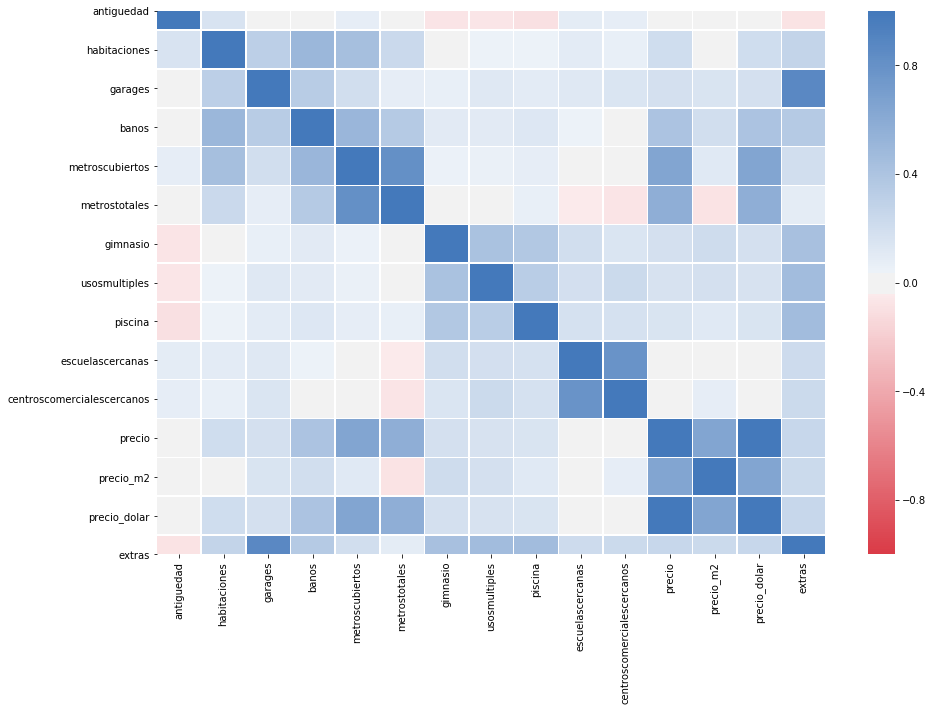

In [5]:
plt.figure(figsize=(15, 10))
cmap = sns.diverging_palette(10, 250, as_cmap=True)
sns.heatmap(corr, 
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            cmap=cmap,
            #annot=True,
            linewidth=0.5,
           vmin=-1,
           vmax=1)


# De este grafico se observa:
# Las correlaciones negativas no son muchas. Principalmente en la antiguedad.
# A menor antiguedad pareceria que hay menor cantidad de extras.
# El precio se ve influenciado principalmente por los metros cubiertos y totales y por la cantidad de baños y habitaciones.
# El resto, no parecen ser lo suficientemente fuerte como para llamar la atencion.

Text(0.5, 1, 'Apartamentos \n')

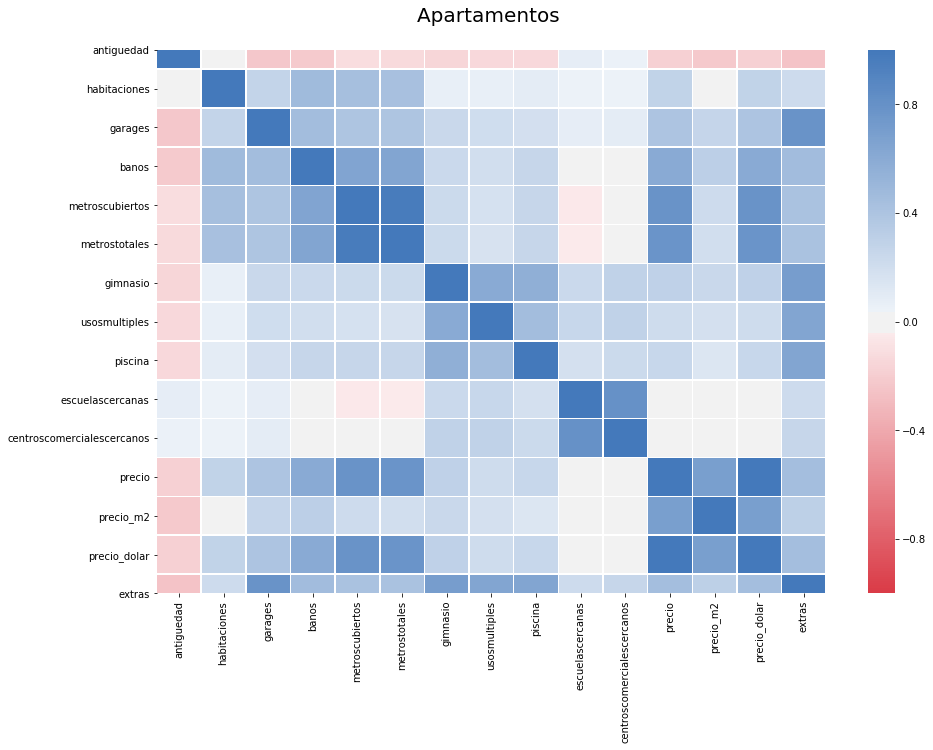

In [6]:
# Y si miro las correlaciones para grupos particulares? Por ejemplo tipos de propiedad?
corr = df[df['tipodepropiedad']=='Apartamento'].corr()
plt.figure(figsize=(15, 10))
cmap = sns.diverging_palette(10, 250, as_cmap=True)
ax = sns.heatmap(corr, 
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            cmap=cmap,
            #annot=True,
            linewidth=0.5,
           vmin=-1,
           vmax=1)

ax.set_title('Apartamentos \n', fontdict={'fontsize':20})

# En los apartamentos, se ve que la correlacion entre la antiguedad y la mayoria de campos (entre ellos el precio) es negativa
# Esto significa que si aumenta la antiguedad, disminuye el precio y los otros campos.

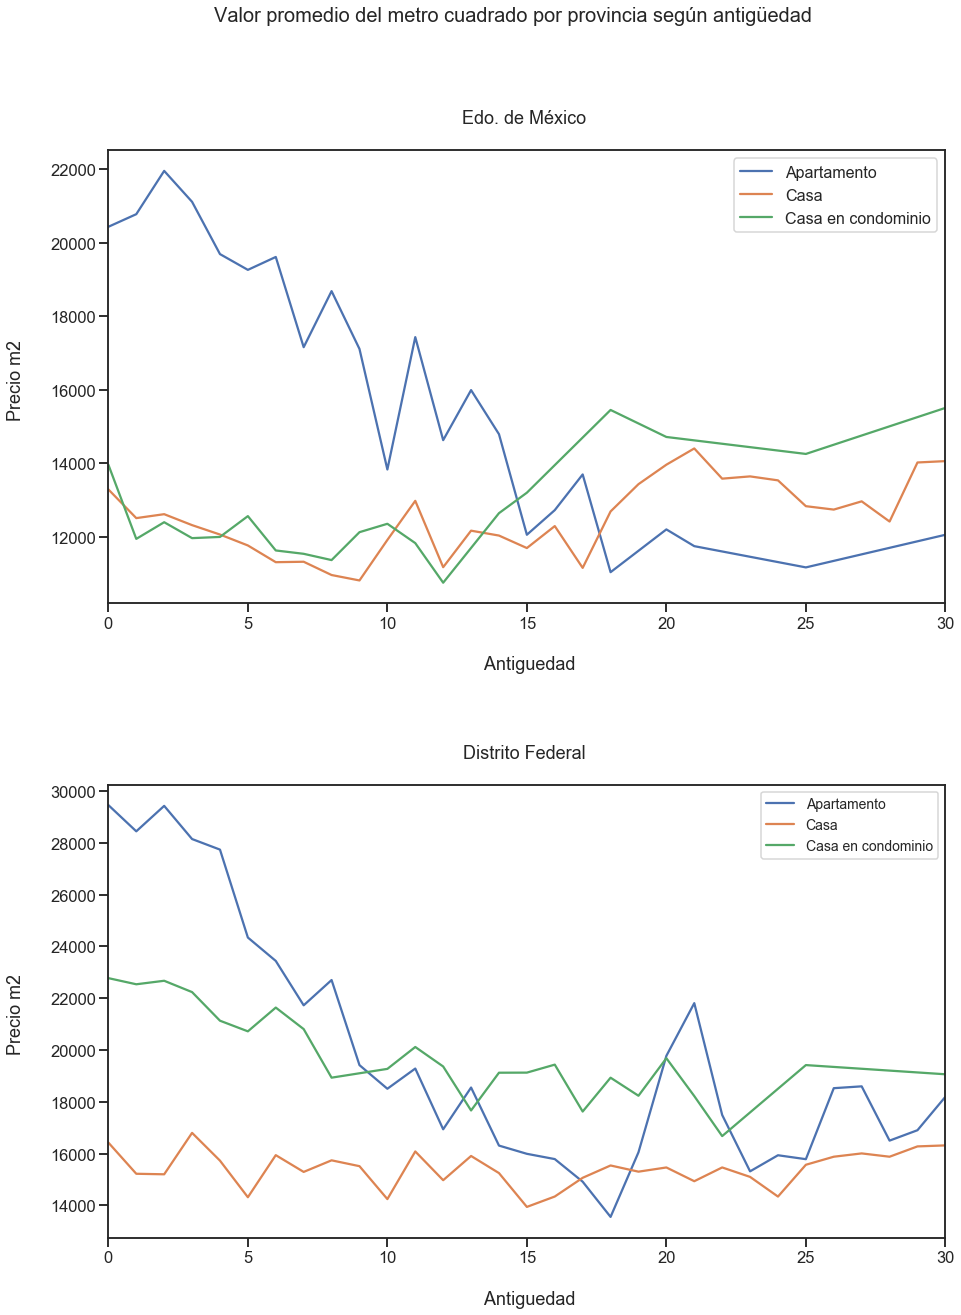

In [40]:
# Influye la antiguedad en el valor de las casas?
# Tomo datos agrupando por antiguedad, tipo de propiedad y provincia. 
# Filtro aquellos grupos donde la cantidad no es suficiente como para hacer un analisis consistente
# Armo un grafico para cada provincia, comparando los tipos de propiedad

df2 = df.copy()

df2 = df2.groupby(['antiguedad','tipodepropiedad','provincia']).filter(lambda x: len(x)>20).groupby(['antiguedad','tipodepropiedad','provincia']).agg({'precio_m2':'mean'})

df2 = df2.reset_index()

df2.dropna(subset=['precio_m2'], inplace=True)

fig,(ax1,ax2) = plt.subplots(2,1, figsize=(15,20))

fig.subplots_adjust(hspace=0.4, wspace=0.4)
fig.suptitle('Valor promedio del metro cuadrado por provincia según antigüedad',fontsize=20)

for name in ['Apartamento','Casa', 'Casa en condominio']:
    
    ax1.plot(df2[(df2.tipodepropiedad==name) & (df2.provincia == 'Edo. de México')].antiguedad,\
            df2[(df2.tipodepropiedad==name) & (df2.provincia == 'Edo. de México')].precio_m2,\
            label=name)
    ax1.set_title('Edo. de México \n')

    ax2.plot(df2[(df2.tipodepropiedad==name) & (df2.provincia == 'Distrito Federal')].antiguedad,\
            df2[(df2.tipodepropiedad==name) & (df2.provincia == 'Distrito Federal')].precio_m2,\
            label=name)
    ax2.set_title('Distrito Federal \n')

    ax1.set_xlim([0,30])
    ax2.set_xlim([0,30])

    
ax1.set_xlabel("\n Antiguedad", fontsize=18)
ax1.set_ylabel("Precio m2 \n", fontsize=18)
ax1.legend(loc='best', fontsize=16)
ax2.set_xlabel("\n Antiguedad", fontsize=18)
ax2.set_ylabel("Precio m2 \n", fontsize=18)
ax2.legend(loc='best', fontsize=14)


In [8]:
df.groupby('provincia').describe()['precio_m2']
#ciudad_promedio_preciom2_similar = ['Edo. de México','Guerrero','Jalisco','Nuevo León']


,count,mean,std,min,25%,50%,75%,max
provincia,,,,,,,,
Aguascalientes,1652.00,7826.09,3837.26,1300.05,5333.33,7358.29,9569.09,56666.67
Baja California Norte,3137.00,5952.65,3209.59,972.22,4025.97,5072.73,6875.00,41138.89
Baja California Sur,1654.00,6972.02,4647.40,987.65,3829.76,5767.83,8863.64,45312.50
Campeche,202.00,7701.41,5003.74,916.47,3861.69,6375.00,10600.33,30208.33
Chiapas,1046.00,10366.78,5179.40,1000.00,6515.27,9988.40,13888.89,32000.00
Chihuahua,4394.00,7710.16,4484.83,816.33,4577.66,7067.86,9922.99,55555.56
Coahuila,3558.00,6742.89,3317.55,900.00,4611.29,6350.00,8326.41,60779.38
Colima,944.00,8027.39,5552.23,1000.00,4166.67,6751.07,9999.80,52459.02
Distrito Federal,50658.00,21357.45,10300.21,875.00,13521.13,19452.95,27187.50,66666.67


In [9]:
# Del grafico anterior, se puede observar:
# En ambas ciudades, los precios de los apartamentos van disminuyendo, a la vez que aumenta la antiguedad
# En el caso de las casas, los precios parecen no verse afectados por la antiguedad, pudiendo tener menos o mas valor
# La diferencia de precios, parece verse mas evidente a partir de los 10 años de antiguedad, no asi en los primeros 5.
# No es un dato menor que vaya disminuyendo pero a la vez siga habiendo picos. Si bien es un dato que influye,
# pueden existir casas mas antiguas de mayor valor.

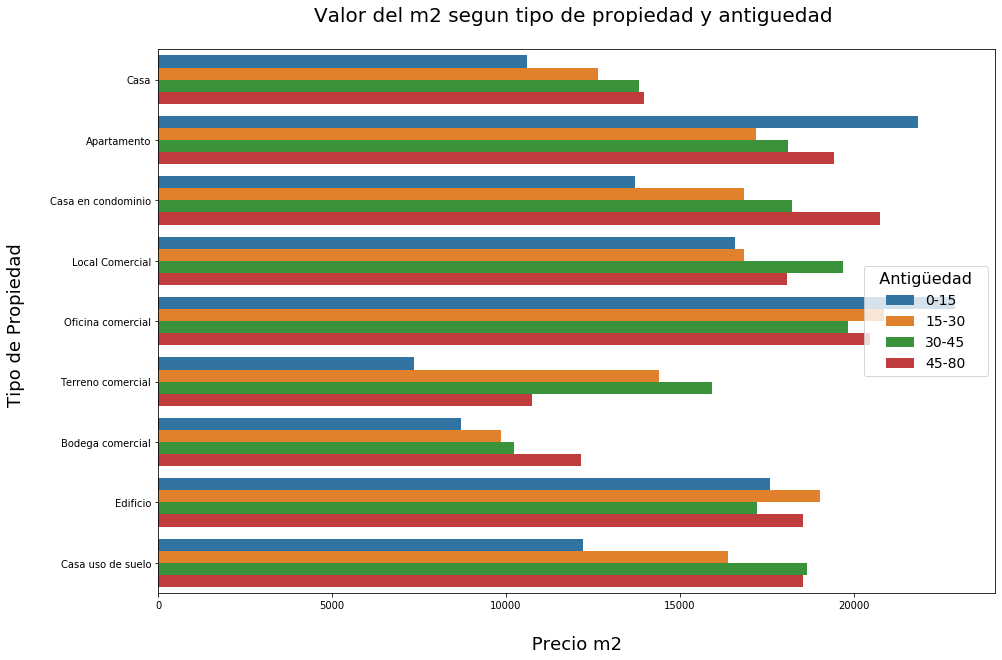

In [10]:
# Se tomn las 10 provincias con mas casas y los 20 tipos de propiedades mas comunes.
# Se evalua el precio del metro cuadrado para cada tipo de propiedad en una provincia distinta

df3 = df.copy()

df3['rango_antiguedad'] = pd.cut(df['antiguedad'],\
                                 bins=[-1,15,30,45,80],\
                                 labels=['0-15', '15-30', '30-45', '45-80'])

top_10_tipos_mas_comunes = df3.groupby('tipodepropiedad').size().sort_values(ascending=False)[0:10]
top_10_tipos_mas_comunes = list(top_10_tipos_mas_comunes.index)
top_10_tipos_mas_comunes.remove('Terreno')

plt.figure(figsize=(15,10))
data = df3.groupby(['rango_antiguedad','tipodepropiedad']).agg({'precio_m2':'mean'})
data = data.reset_index()

data = data.loc[data['tipodepropiedad'].isin(top_10_tipos_mas_comunes),:]

data.tipodepropiedad.cat.remove_unused_categories(inplace=True)

pivot = data.pivot(index='tipodepropiedad', columns='rango_antiguedad', values='precio_m2')

mask = pivot.isnull()
cmap = sns.cubehelix_palette(as_cmap=True, light=.9)
#ax = sns.heatmap(pivot, cmap="YlGnBu")


ax = sns.barplot(data=data, y='tipodepropiedad', x='precio_m2', hue='rango_antiguedad', order=top_10_tipos_mas_comunes)

ax.set_xlabel('\n Precio m2 ', fontsize=18)
ax.set_ylabel('Tipo de Propiedad \n', fontsize=18)
ax.set_title('Valor del m2 segun tipo de propiedad y antiguedad \n', fontdict={'fontsize':20})
plt.legend(title='  Antigüedad  ', title_fontsize=16, fontsize=14, loc='center right')

#ax.set_facecolor('xkcd:grey')


# De este grafico, se puede sacar como informacion:
# Los tres tipos de casas, tienden a incrementar levemente su valor.
# Los apartamentos, y los edificios, tienden a decrementar levemente su valor.
# El resto presentan un comportamiento irregular, del que es dificil predecir algo.

In [11]:
# Caracteristicas principales de agrupar por habitaciones
# Las casas de mas habitaciones, son mucho mas viejas
# No es algo muy importante, pero es un dato curioso
df.groupby('habitaciones').mean()

,antiguedad,garages,banos,metroscubiertos,metrostotales,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio,precio_m2,precio_dolar,extras
habitaciones,,,,,,,,,,,,,,
0.00,3.62,0.23,0.43,119.47,233.68,0.01,0.00,0.03,0.26,0.24,1913829.77,10356.31,97944.21,0.27
1.00,6.75,0.84,1.11,86.50,105.07,0.11,0.08,0.12,0.39,0.37,1573829.47,18704.90,80543.99,1.15
2.00,6.54,1.17,1.43,94.67,109.59,0.06,0.05,0.08,0.46,0.42,1517876.96,14616.52,77680.50,1.36
3.00,6.00,1.57,2.25,188.92,205.24,0.07,0.06,0.11,0.47,0.42,2560967.82,13733.04,131062.84,1.81
4.00,9.47,1.48,2.58,254.43,268.96,0.06,0.06,0.09,0.48,0.42,3082621.06,13157.68,157759.52,1.68
5.00,12.82,1.28,2.31,265.93,279.92,0.04,0.05,0.05,0.48,0.41,2792643.51,12090.86,142919.32,1.42
6.00,14.80,1.12,2.23,274.36,287.67,0.02,0.03,0.03,0.45,0.36,2732081.43,12138.40,139819.93,1.21
7.00,16.36,1.02,2.11,286.86,301.21,0.02,0.01,0.02,0.46,0.39,3039151.85,12808.33,155534.89,1.07
8.00,15.22,0.94,1.91,286.16,301.35,0.01,0.02,0.03,0.48,0.40,2893105.59,12332.66,148060.68,1.00


In [12]:
# Cantidad de tipos de propiedades
df.tipodepropiedad.value_counts()

Casa                             129590
Apartamento                       55106
Casa en condominio                17460
Terreno                            8912
Local Comercial                    2590
Oficina comercial                  1549
Terreno comercial                  1180
Bodega comercial                   1017
Edificio                            674
Casa uso de suelo                   573
Quinta Vacacional                   355
Duplex                              319
Villa                               316
Inmuebles productivos urbanos       154
Rancho                              152
Local en centro comercial           147
Departamento Compartido             135
Otros                                88
Nave industrial                      56
Terreno industrial                   21
Huerta                               17
Lote                                  4
Hospedaje                             1
Garage                                1
Name: tipodepropiedad, dtype: int64

In [13]:
# Provincias mas grandes
df.groupby(['ciudad']).size().sort_values()[-10:]

ciudad
Atizapán de Zaragoza     5292
Alvaro Obregón           5446
Naucalpan de Juárez      5601
Cuauhtémoc               5613
Monterrey                6235
Mérida                   6813
San Luis Potosí          7176
Benito Juárez            9760
Zapopan                  9776
Querétaro               12241
dtype: int64

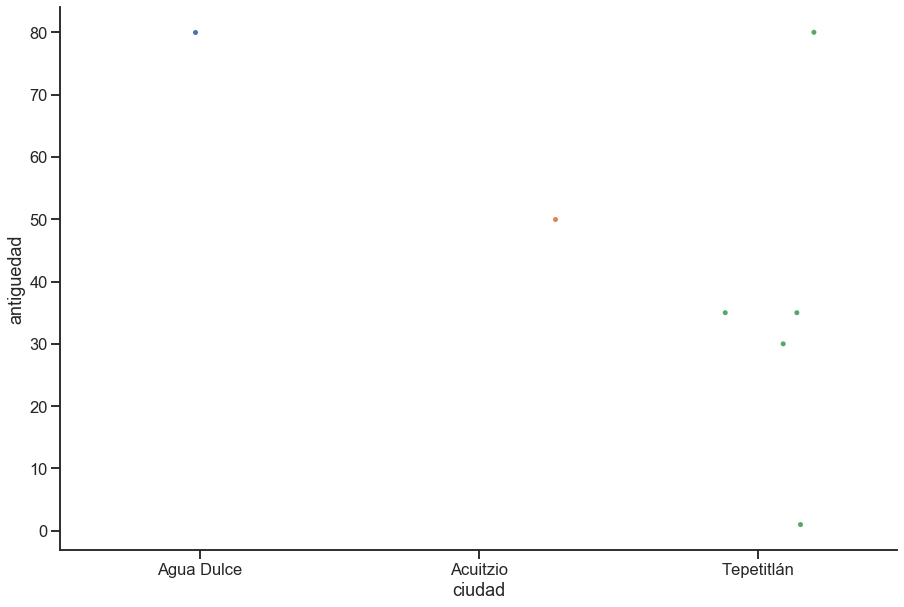

In [51]:

plt.figure(figsize=(15, 10))


top_ciudades_mas_antiguas = df.groupby('ciudad').agg({'antiguedad':'mean'}).sort_values(by='antiguedad',ascending=False)[0:3]
top_ciudades_mas_antiguas = list(top_ciudades_mas_antiguas.index)


df_ciudades = df.loc[df['ciudad'].isin(top_ciudades_mas_antiguas), :]

sns.set(style='ticks', context='talk')

sns.stripplot(x='ciudad', y='antiguedad', data=df_ciudades, jitter=0.35, order=top_ciudades_mas_antiguas)
sns.despine()

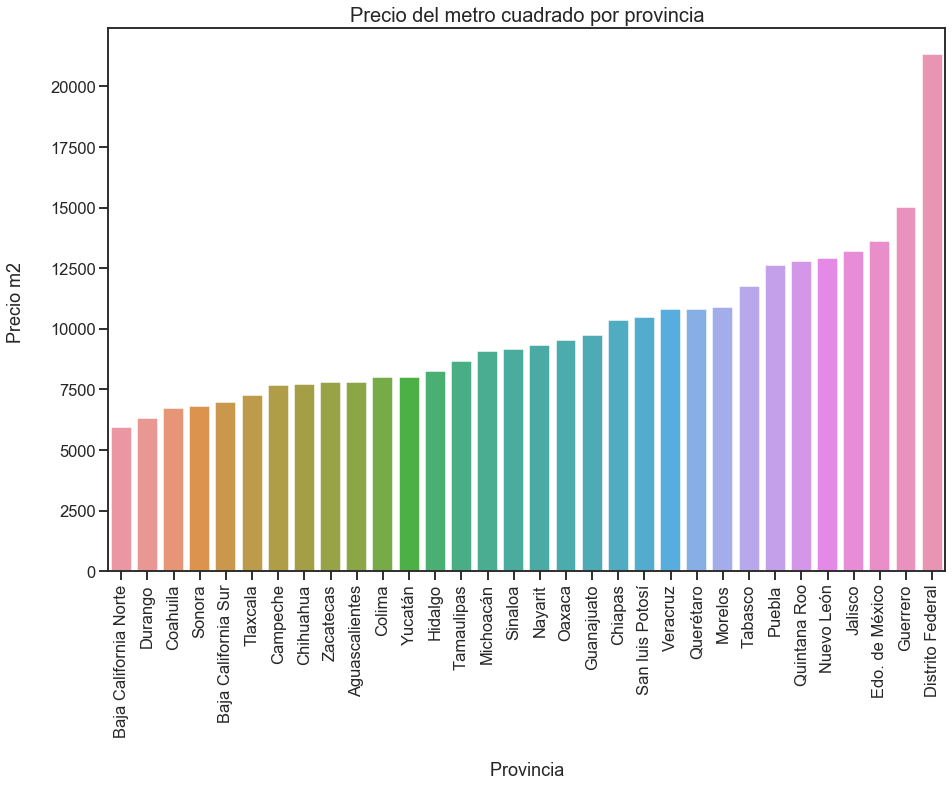

In [52]:


plt.figure(figsize=(15,10))

df2 = df.copy()



df_provs = df2.groupby('provincia').precio_m2.mean().reset_index()

df_provs.sort_values(by='precio_m2', inplace=True)

df_provs = df_provs.reset_index(drop=True)

df_provs['provincia'] = df_provs['provincia'].astype(str)


ax = sns.barplot(data=df_provs, x='provincia', y='precio_m2')

ax.set_title('Precio del metro cuadrado por provincia', fontdict={'fontsize':20})
ax.set_ylabel('Precio m2 \n', fontsize=18)
ax.set_xlabel('\n Provincia ', fontsize=18)

ax = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

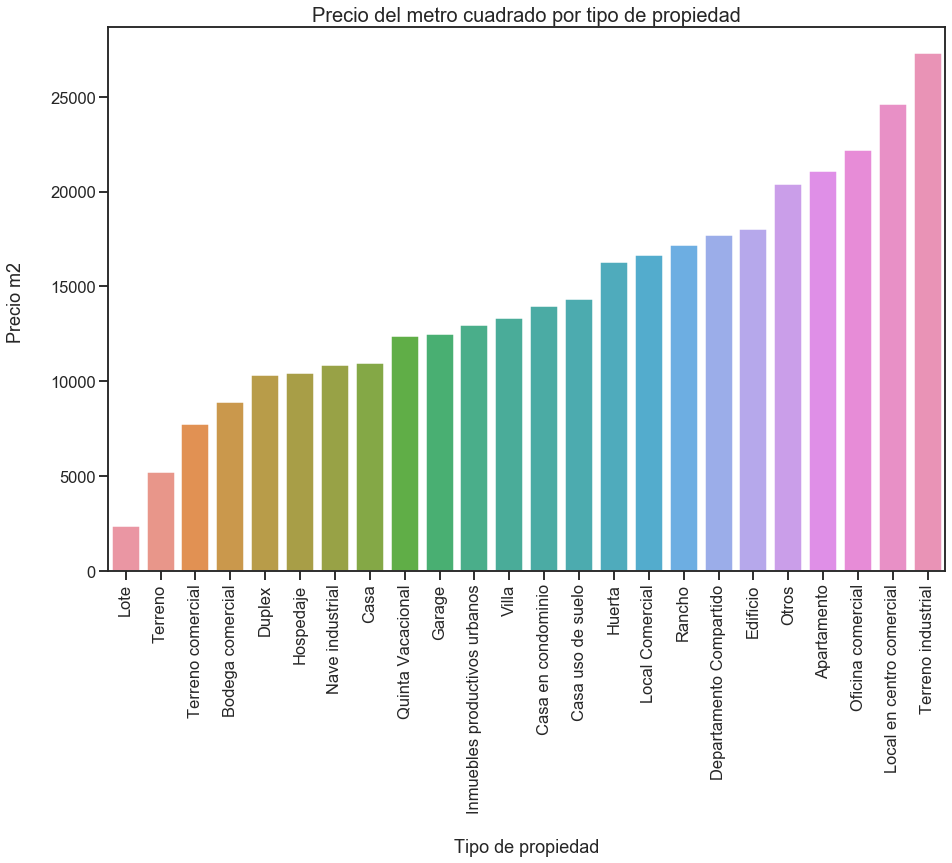

In [16]:
plt.figure(figsize=(15,10))

df2 = df.copy()



df_provs = df2.groupby('tipodepropiedad').precio_m2.mean().reset_index()

df_provs.sort_values(by='precio_m2', inplace=True)

df_provs = df_provs.reset_index(drop=True)

df_provs['tipodepropiedad'] = df_provs['tipodepropiedad'].astype(str)


ax = sns.barplot(data=df_provs, x='tipodepropiedad', y='precio_m2')

ax.set_title('Precio del metro cuadrado por tipo de propiedad', fontdict={'fontsize':20})
ax.set_ylabel('Precio m2 \n', fontsize=18)
ax.set_xlabel('\n Tipo de propiedad ', fontsize=18)

ax = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

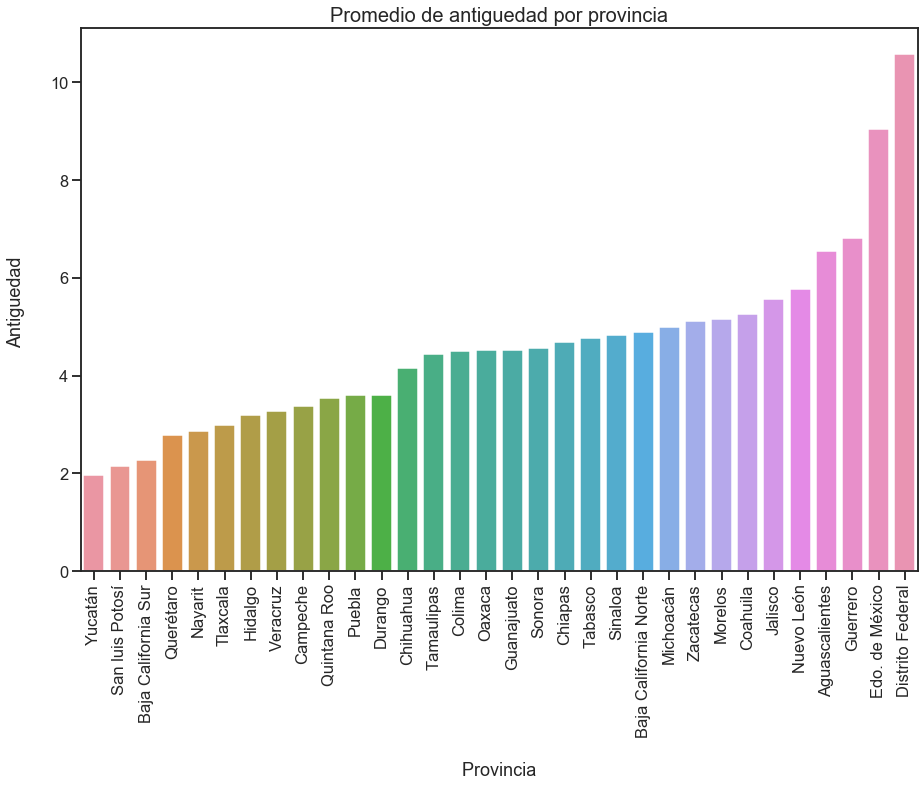

In [64]:
plt.figure(figsize=(15,10))

df2 = df.copy()


df_provincias = df2.groupby('provincia').antiguedad.mean().reset_index()

df_provincias.sort_values(by='antiguedad', inplace=True)

df_provincias = df_ciudades.reset_index(drop=True)


df_provincias['provincia'] = df_provincias['provincia'].astype(str)

ax = sns.barplot(data=df_provincias, x='provincia', y='antiguedad')

ax.set_title('Promedio de antiguedad por provincia', fontdict={'fontsize':20})
ax.set_ylabel('Antiguedad \n', fontsize=18)
ax.set_xlabel('\n Provincia ', fontsize=18)

ax = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

In [17]:
df[df.tipodepropiedad=='Lote']

,titulo,descripcion,tipodepropiedad,ciudad,provincia,antiguedad,habitaciones,garages,banos,metroscubiertos,...,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio,precio_m2,precio_dolar,extras
id,,,,,,,,,,,,,,,,,,,,,
257049,"terreno / lote en venta, alvarado, veracruz",chatea con nosotros para conocer mas sobre est...,Lote,Alvarado,Veracruz,0.00,0.00,0.00,0.00,0.00,...,2014-12-14,False,False,False,False,False,781704.00,3908.52,40005.32,0.00
169168,terreno/lote - paseo ex hacienda barbosa,"oportunidad de terreno, plano, con servicio de...",Lote,Zinacantepec,Edo. de México,0.00,0.00,0.00,0.00,0.00,...,2016-05-09,False,False,False,False,False,702100.00,1700.00,35931.42,0.00
104078,terreno/lote - privada de rio nasas,excelente opción de terreno para las familias ...,Lote,Metepec,Edo. de México,0.00,0.00,0.00,0.00,0.00,...,2016-05-09,False,False,False,False,False,500000.00,2415.46,25588.54,0.00
136796,terreno/lote - 3er. cerrada de juan escutia,bonito terreno ubicado en una zona de crecimie...,Lote,Toluca,Edo. de México,0.00,0.00,0.00,0.00,0.00,...,2016-05-10,False,False,False,False,False,510000.00,1508.88,26100.31,0.00


ANALISIS POR CIUDAD Y/O PROVINCIA

In [18]:
df_ciudades = df.groupby(['ciudad','tipodepropiedad']).agg({'precio_m2':'mean'})
df_ciudades

precio_m2
ciudad    tipodepropiedad              
Abalá     Apartamento               nan
          Bodega comercial          nan
          Casa                      nan
          Casa en condominio        nan
          Casa uso de suelo         nan
...                                 ...
ZirAndaro Terreno comercial         nan
          Terreno industrial        nan
          Villa                     nan
          Hospedaje                 nan
          Garage                    nan

[21000 rows x 1 columns]

In [19]:
top_3_provincias_mas_pobladas = df.groupby('provincia').size().sort_values(ascending=False)[0:3]
top_3_provincias_mas_pobladas = list(top_3_provincias_mas_pobladas.index)
plt.figure(figsize=(20, 10))

df_provincias = df.groupby(['provincia','tipodepropiedad']).agg({'precio_m2':'mean'})

df_provincias = df_provincias.reset_index()
df_provincias

,provincia,tipodepropiedad,precio_m2
0,Aguascalientes,Apartamento,13216.45
1,Aguascalientes,Bodega comercial,6916.80
2,Aguascalientes,Casa,7588.02
3,Aguascalientes,Casa en condominio,9402.97
4,Aguascalientes,Casa uso de suelo,8037.66
...,...,...,...
763,Zacatecas,Terreno comercial,8695.65
764,Zacatecas,Terreno industrial,nan
765,Zacatecas,Villa,nan
766,Zacatecas,Hospedaje,nan


<Figure size 1440x720 with 0 Axes>

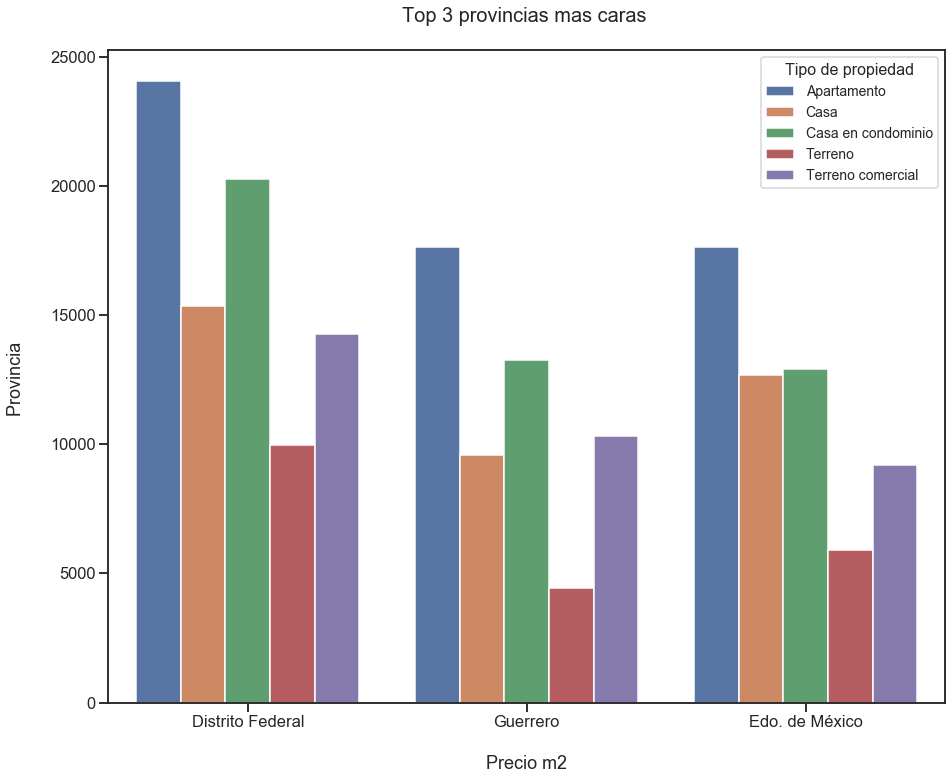

In [66]:
top_3_provincias_mas_caras = df.groupby('provincia').agg({'precio_m2':'mean'}).sort_values(by='precio_m2',ascending=False)[0:3]
top_3_provincias_mas_caras = list(top_3_provincias_mas_caras.index)
plt.figure(figsize=(15, 12))

df_provincias = df.groupby(['provincia','tipodepropiedad']).agg({'precio_m2':'mean'})

df_provincias = df_provincias.reset_index()

df_provincias = df_provincias.loc[df_provincias['tipodepropiedad'].isin(['Apartamento','Casa','Casa en condominio','Terreno','Terreno comercial']), :]
df_provincias.tipodepropiedad.cat.remove_unused_categories(inplace=True)

df_provincias.rename(columns={'tipodepropiedad':'Tipo de propiedad'}, inplace=True)

ax = sns.barplot(data=df_provincias, x='provincia', y='precio_m2', hue='Tipo de propiedad', order=top_3_provincias_mas_caras)

ax.set(xlabel='\n Provincia ', ylabel='Precio m2 \n')
ax.set_title('Top 3 provincias mas caras \n', fontdict={'fontsize':20})
ax.set_xlabel('\n Precio m2 ', fontsize=18)
ax.set_ylabel('Provincia \n', fontsize=18)
plt.legend(title='Tipo de propiedad', title_fontsize=16, fontsize=14)
plt.show()


# Este grafico esta de mas ya qe dice lo mismo que el de abajo. Deberia hacer alguno con las ciudades


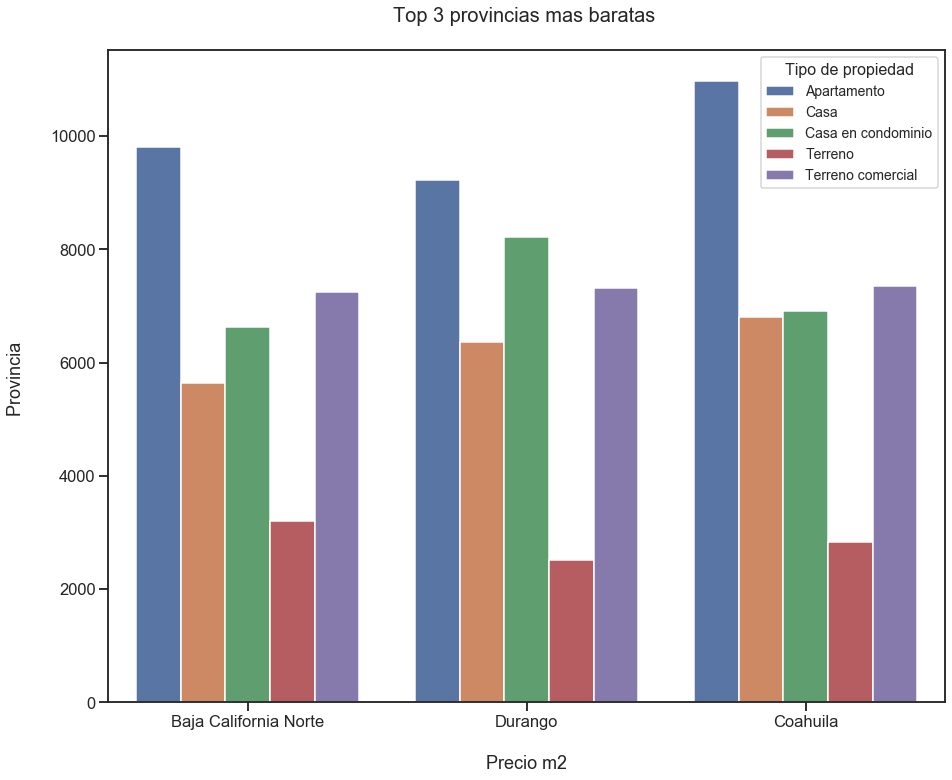

In [65]:
top_3_provincias_mas_caras = df.groupby('provincia').agg({'precio_m2':'mean'}).sort_values(by='precio_m2',ascending=True)[0:3]
top_3_provincias_mas_caras = list(top_3_provincias_mas_caras.index)
plt.figure(figsize=(15, 12))

df_provincias = df.groupby(['provincia','tipodepropiedad']).agg({'precio_m2':'mean'})

df_provincias = df_provincias.reset_index()

df_provincias = df_provincias.loc[df_provincias['tipodepropiedad'].isin(['Apartamento','Casa','Casa en condominio','Terreno','Terreno comercial']), :]
df_provincias.tipodepropiedad.cat.remove_unused_categories(inplace=True)

df_provincias.rename(columns={'tipodepropiedad':'Tipo de propiedad'}, inplace=True)

ax = sns.barplot(data=df_provincias, x='provincia', y='precio_m2', hue='Tipo de propiedad', order=top_3_provincias_mas_caras)

ax.set(xlabel='\n Provincia ', ylabel='Precio m2 \n')
ax.set_title('Top 3 provincias mas baratas \n', fontdict={'fontsize':20})
ax.set_xlabel('\n Precio m2 ', fontsize=18)
ax.set_ylabel('Provincia \n', fontsize=18)
plt.legend(title='Tipo de propiedad',title_fontsize=16, fontsize=14, loc='upper right')
plt.show()



In [22]:
# Voy a intentar primero, tener una nocion de como se distribuyen los datos respecto a la antiguedad.
# Se me ocurre un scatter plot de precio y antiguedad pero por categorias (tipos de propiedad)
df.groupby('provincia').describe()['precio_m2'][['count','mean']].sort_values(by='mean')

,count,mean
provincia,,
Baja California Norte,3137.00,5952.65
Durango,2190.00,6338.68
Coahuila,3558.00,6742.89
Sonora,2832.00,6811.93
Baja California Sur,1654.00,6972.02
Tlaxcala,811.00,7280.85
Campeche,202.00,7701.41
Chihuahua,4394.00,7710.16
Zacatecas,87.00,7819.06


c:\users\gaston.parente\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


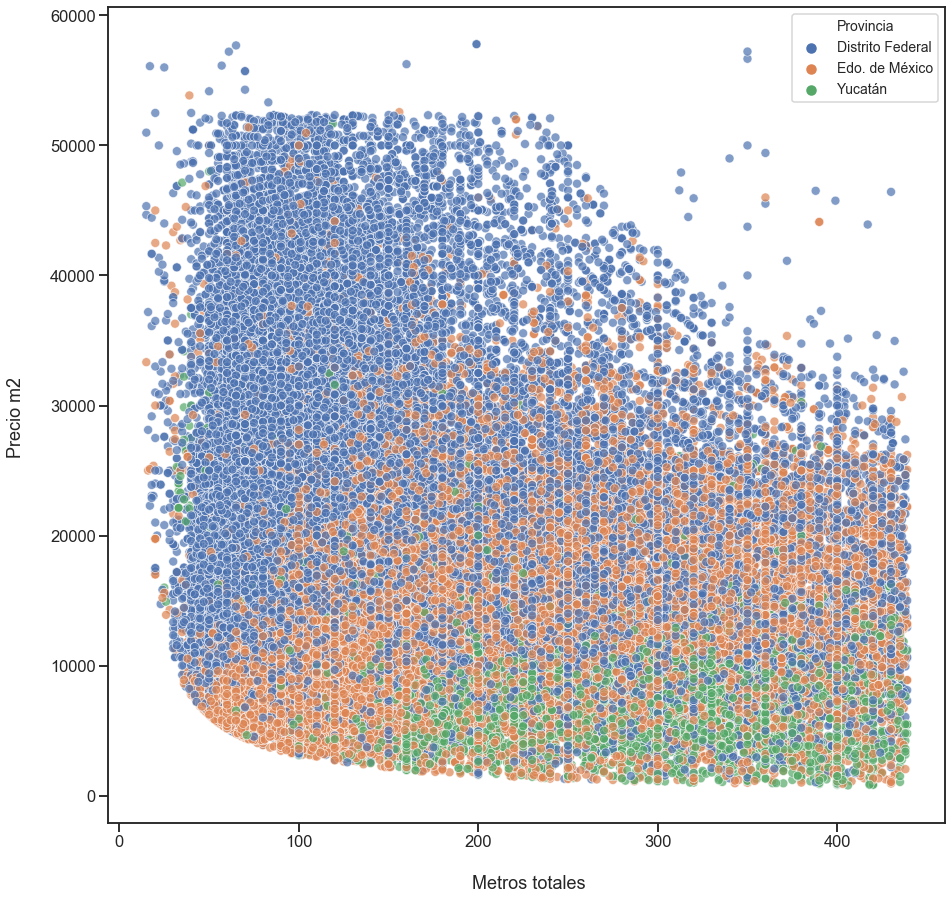

In [71]:
# De lo visto anterior, selecciono tres provincias representativas. Distrito Federal, Coahuila y Yucatán
# Con buen caudal de gente, y con promedios de precios por metro cuadrado distintos.
plt.figure(figsize=(15,15))

data = df[df['provincia'].isin(['Distrito Federal', 'Edo. de México' ,'Yucatán'])]
# Lo hago menro a 90000 ya que, sino, hay algunos datos sueltos que hacne que no se vea tan bien
data = data[df['precio_m2']<=60000]
data.provincia.cat.remove_unused_categories(inplace=True)
data.rename(columns={'provincia':'Provincia'}, inplace=True)

ax = sns.scatterplot(y='precio_m2', x='metrostotales', data=data, hue='Provincia', alpha=0.7)


ax.set_xlabel('\n Metros totales', fontsize=18)
ax.set_ylabel('Precio m2 \n', fontsize=18)
ax.legend(title_fontsize=16, fontsize=14)


# Este scatter plot revela un monton de informacion:
# Primer dato interesante: 
# Las propiedades de mayor valor por metro cuadrado, suelen ser las mas chicas, y las 
# propiedades de menor valor por metro cuadrado, suelen ser las mas grandes.
# Segundo dato curioso: 
# Se puede ver como en Distrito Federal, abundan las propiedades chicas y caras, mientras que en Yucatan hay muchas 
# mas propiedades grandes y con menos valor por metro cuadrado.
# En estado de mexico las casas chicas parecen ser mas baratas que en yucatan y distrito.
# Aca si podria llegar a servir agrupar varias provincias en una para de esa forma poder entender mejor e incluir 
# mucha mas cantidad de datos


Text(103.42187499999999, 0.5, '')

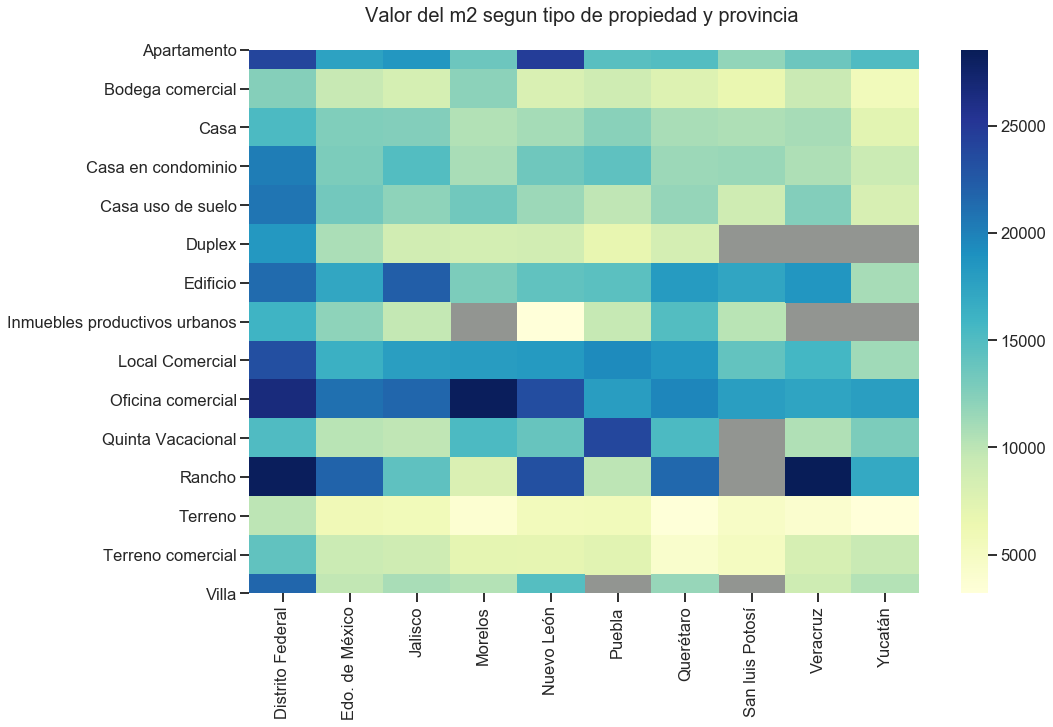

In [24]:
# Se tomn las 10 provincias con mas casas y los 20 tipos de propiedades mas comunes.
# Se evalua el precio del metro cuadrado para cada tipo de propiedad en una provincia distinta

top_10_provincias_mas_pobladas = df.groupby('provincia').size().sort_values(ascending=False)[0:10]
top_10_provincias_mas_pobladas = list(top_10_provincias_mas_pobladas.index)

top_15_tipos_mas_comunes = df.groupby('tipodepropiedad').size().sort_values(ascending=False)[0:15]
top_15_tipos_mas_comunes = list(top_15_tipos_mas_comunes.index)

plt.figure(figsize=(15,10))
data = df.groupby(['provincia','tipodepropiedad']).filter(lambda x: len(x)>1).groupby(['provincia','tipodepropiedad']).agg({'precio_m2':'mean'})
data = data.reset_index()

data = data.loc[data['provincia'].isin(top_10_provincias_mas_pobladas),:]
data = data.loc[data['tipodepropiedad'].isin(top_15_tipos_mas_comunes),:]

data.tipodepropiedad.cat.remove_unused_categories(inplace=True)
data.provincia.cat.remove_unused_categories(inplace=True)

pivot = data.pivot(index='tipodepropiedad', columns='provincia', values='precio_m2')

mask = pivot.isnull()
#cmap = sns.cubehelix_palette(as_cmap=True, light=.9)
ax = sns.heatmap(pivot, cmap="YlGnBu")
ax.set_facecolor('xkcd:grey')
ax.set_title('Valor del m2 segun tipo de propiedad y provincia \n', fontdict={'fontsize':20})
ax.set_xlabel('')
ax.set_ylabel('')

# Los grises, son missing values

# Este heatmap revela mucha informacion:
# Ranchos, oficinas y locales, son los mas caros
# Los apartamentos, son mas caros que las casas (raro)
# Distrito Federal, es mas caro que el resto
# Ademas, permite ver la variacion del precio segun el lugar y el tipo.
# Dudas. Esta bien dejar los missing values? o deberia sacar esas categorias?
# Podria mostrar mas informacion, pero los missing values crecen considerablemente

In [25]:
pivot

provincia,Distrito Federal,Edo. de México,Jalisco,Morelos,Nuevo León,Puebla,Querétaro,San luis Potosí,Veracruz,Yucatán
tipodepropiedad,,,,,,,,,,
Apartamento,24044.44,17620.17,18477.97,13657.66,24583.77,14656.82,14878.56,11866.42,13644.56,15127.66
Bodega comercial,12434.83,9432.11,8405.97,12175.00,8068.19,8846.09,7734.63,6611.34,9311.48,5596.33
Casa,15335.71,12669.42,12503.56,10460.86,11040.65,12275.34,10906.63,10626.45,10941.88,7319.58
Casa en condominio,20247.08,12888.75,14935.46,10844.71,13513.87,14348.84,11410.61,11580.12,10697.28,9208.64
Casa uso de suelo,20808.53,13353.38,12043.84,13455.53,11426.29,9882.91,11772.62,8834.43,12505.61,8182.42
Duplex,18411.98,10809.35,8713.60,8603.20,8642.84,6788.87,8494.48,nan,nan,nan
Edificio,21378.32,17182.88,22196.10,12816.69,14230.49,14485.91,18237.59,17340.96,18560.49,10955.11
Inmuebles productivos urbanos,15977.51,12086.44,9679.05,nan,3194.62,9589.82,14882.84,10151.47,nan,nan
Local Comercial,23359.47,16454.06,17925.79,18082.21,18296.51,19391.39,18462.49,14116.64,15725.06,11250.57


In [26]:
len(list(df['tipodepropiedad'].value_counts().index))

24

In [27]:
df.columns

Index(['titulo', 'descripcion', 'tipodepropiedad', 'ciudad', 'provincia',
       'antiguedad', 'habitaciones', 'garages', 'banos', 'metroscubiertos',
       'metrostotales', 'fecha', 'gimnasio', 'usosmultiples', 'piscina',
       'escuelascercanas', 'centroscomercialescercanos', 'precio', 'precio_m2',
       'precio_dolar', 'extras'],
      dtype='object')

In [28]:
df['mes'] = df['fecha'].dt.month
df['año'] = df['fecha'].dt.year

In [29]:
df.groupby(['año','mes']).size()

año   mes
2012  1       1458
      2       1268
      3       1040
      4       1346
      5       1764
      6       1445
      7       1834
      8       3710
      9       2393
      10      2800
      11      1502
      12      1367
2013  1       1873
      2       1300
      3       1605
      4       1695
      5       1861
      6       1854
      7       2350
      8       2209
      9       3092
      10      3732
      11      3716
      12      2917
2014  1       2189
      2       2315
      3       2718
      4       2598
      5       2902
      6       2865
      7       2933
      8       3289
      9       3692
      10      3559
      11      4324
      12      4252
2015  1       4031
      2       3626
      3       3687
      4       3538
      5       3407
      6       3526
      7       3554
      8       4239
      9       4439
      10      5086
      11      4462
      12      3990
2016  1       5339
      2       4225
      3       4565
      4       6078
  

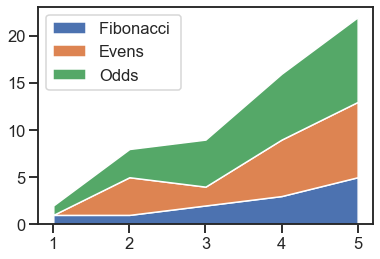

In [30]:
# Ya se me va a ocurrir algo con el diagrama de area

x = [1, 2, 3, 4, 5]
y1 = [1, 1, 2, 3, 5]
y2 = [0, 4, 2, 6, 8]
y3 = [1, 3, 5, 7, 9]

y = np.vstack([y1, y2, y3])

labels = ["Fibonacci ", "Evens", "Odds"]

fig, ax = plt.subplots()
ax.stackplot(x, y1, y2, y3, labels=labels)
ax.legend(loc='upper left')
plt.show()


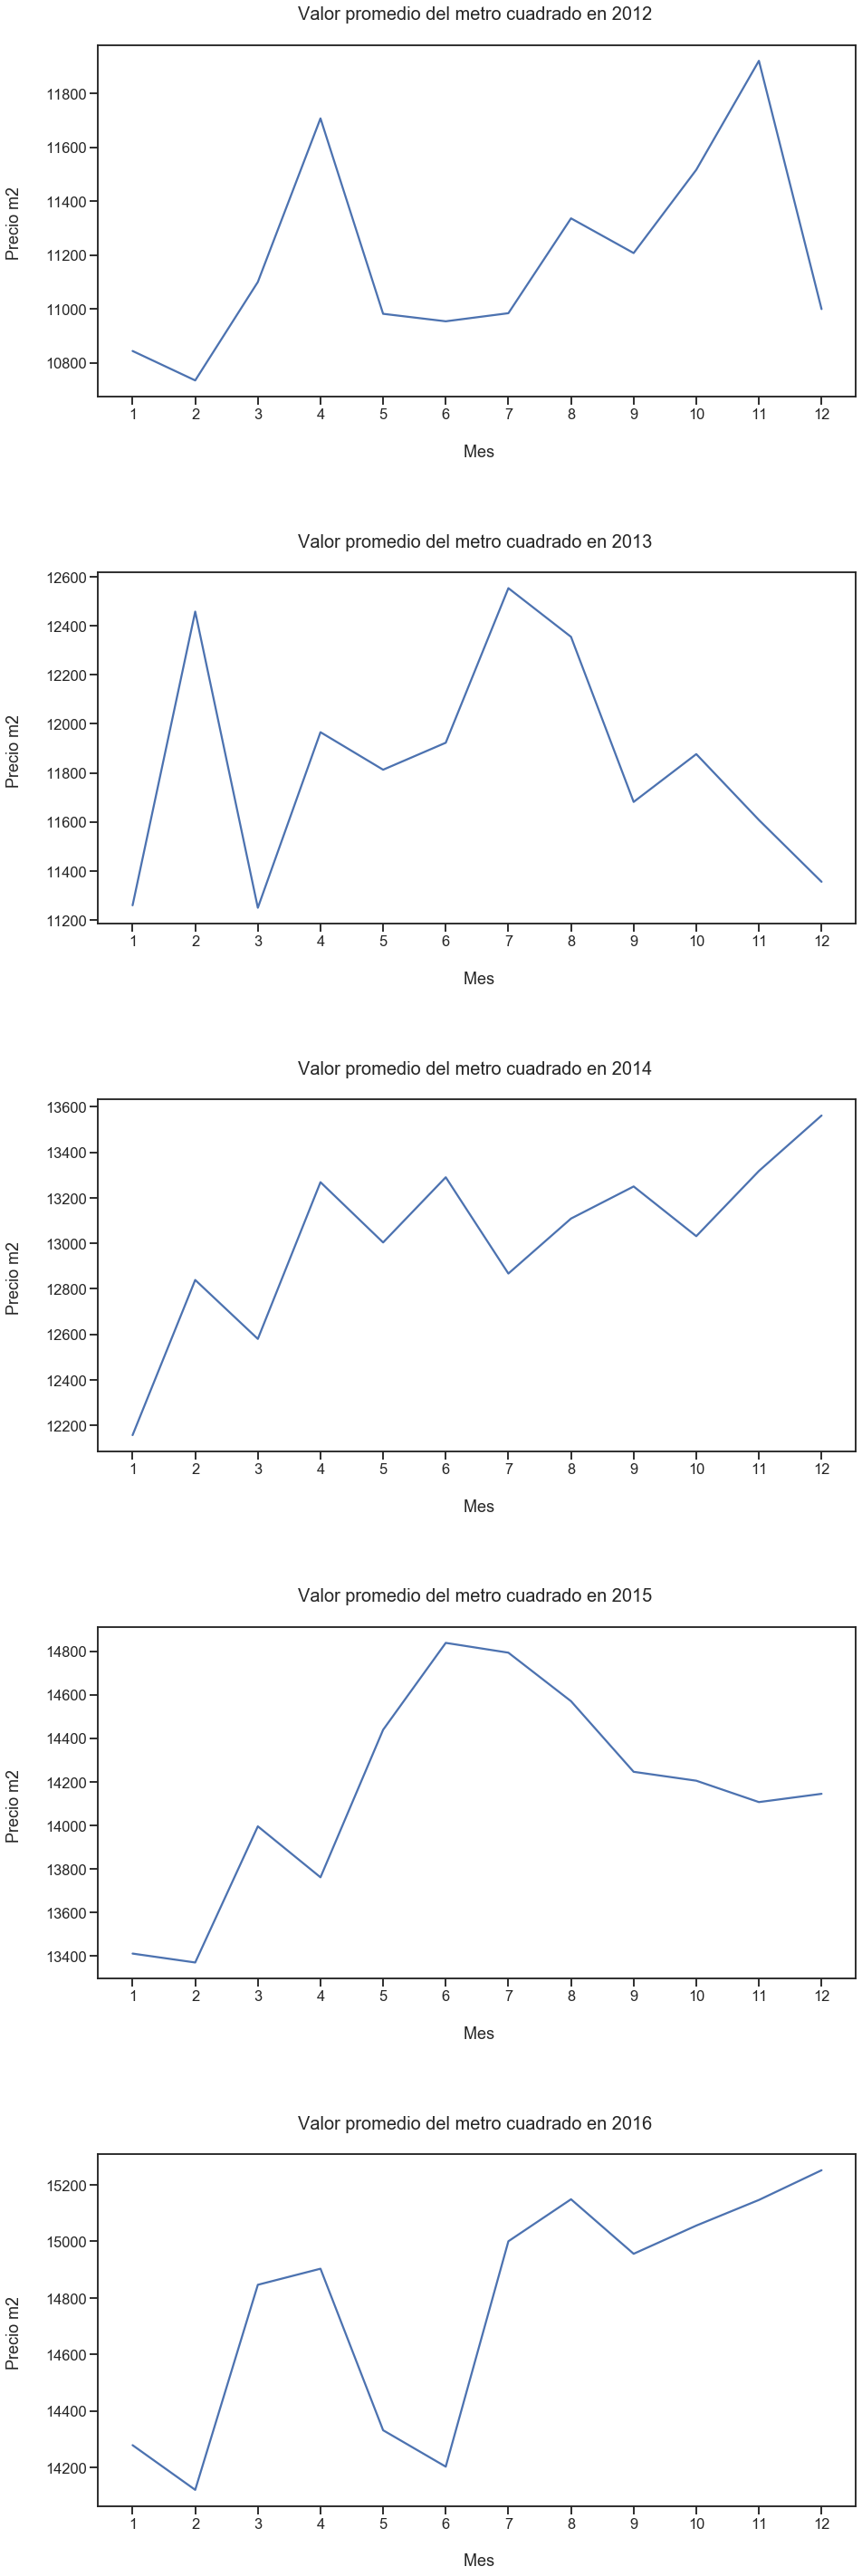

In [31]:
# Como fue variando el precio del metro cuadrado en pesos mexicanos a lo largo de los años?
df2 = df.copy()
df2 = df2.groupby(['año','mes']).agg({'precio_m2':'mean'})
df2 = df2.reset_index()

fig,ax1 = plt.subplots(5,1, figsize=(15,50))
i = 0
plt.setp(ax1, xticks=[1,2,3,4,5,6,7,8,9,10,11,12])
fig.subplots_adjust(hspace=0.5)

for año in [2012,2013,2014,2015,2016]: 
    ax1[i].set_xlabel("\n Mes",fontsize=18)
    ax1[i].set_ylabel("Precio m2 \n",fontsize=18)
    ax1[i].plot(df2[(df2.año==año)].mes,\
            df2[(df2.año==año)].precio_m2,\
            label=name)
    ax1[i].set_title('Valor promedio del metro cuadrado en {} \n'.format(año), fontsize=20)
    plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
    i += 1

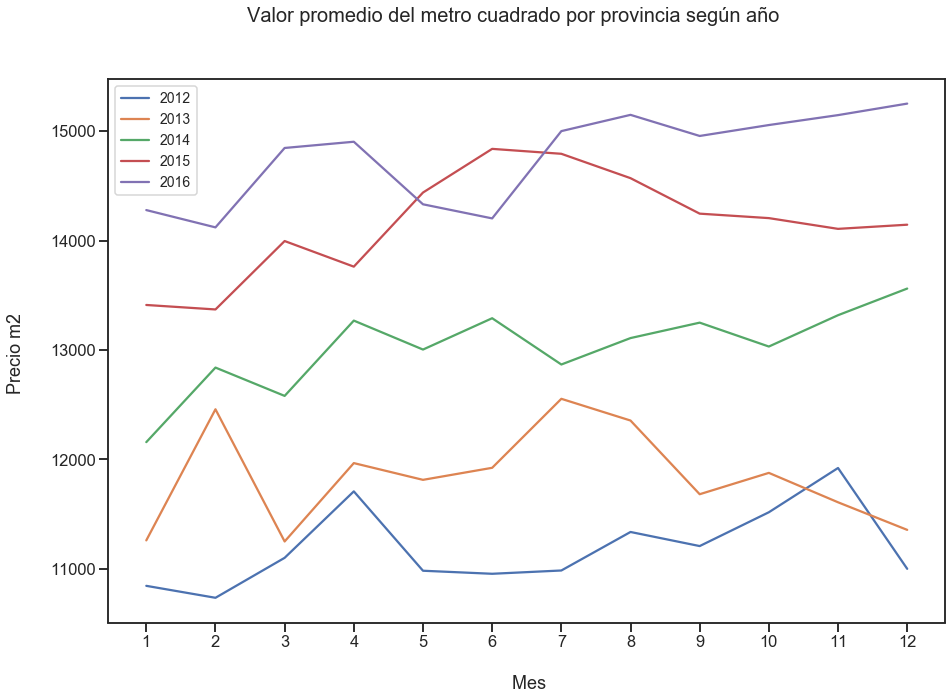

In [32]:
# Como fue variando el precio del metro cuadrado en pesos mexicanos a lo largo de los años?

df2 = df.copy()

df2 = df2.groupby(['año','mes']).agg({'precio_m2':'mean'})

df2 = df2.reset_index()

fig,ax1 = plt.subplots(1,1, figsize=(15,10))

fig.subplots_adjust(hspace=0.4, wspace=0.4)
fig.suptitle('Valor promedio del metro cuadrado por provincia según año',fontsize=20)

for año in [2012,2013,2014,2015,2016]:
    
    ax1.plot(df2[(df2.año==año)].mes,\
            df2[(df2.año==año)].precio_m2,\
            label=año)

plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])    
ax1.set_xlabel("\n Mes", fontsize=18)
ax1.set_ylabel("Precio m2 \n", fontsize=18)
ax1.legend(loc='best', title_fontsize=16, fontsize=14)


# De este grafico se observa:
# Este grafico son todos los anteriores juntos.
# Las 5 lineas, respectivas a cada año, son casi paralelas, y salvo 2013 (se mantiene), todas incrementan.
# Esto nos da la pauta de que año a año los valores de las propiedades, van subiendo.

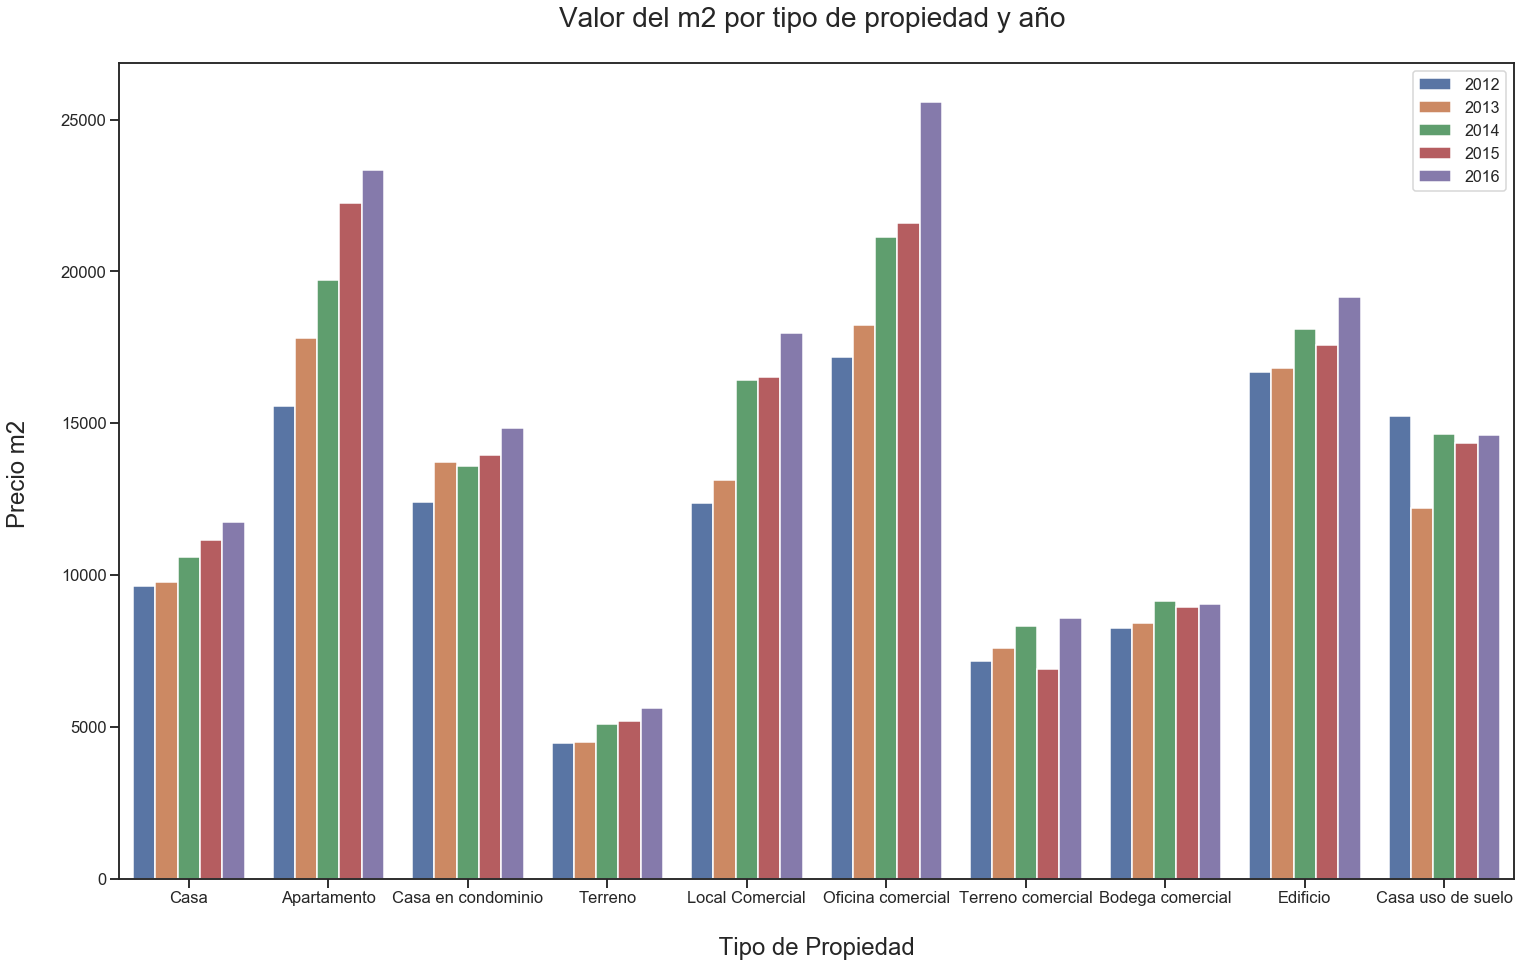

In [33]:
# Y si tomo en cuenta los tipos de propiedades. Todas fueron subiendo de precio? O como se comportaron?
# Filtro para asegurarme de que los grupos que tomo sean de mas de 20 casas

df_años = df.groupby(['año','tipodepropiedad']).filter(lambda x: len(x)>20).groupby(['año','tipodepropiedad']).agg({'precio_m2':'mean'})
top_5_tipos_mas_comunes = df.groupby('tipodepropiedad').size().sort_values(ascending=False)[0:10]
top_5_tipos_mas_comunes = list(top_5_tipos_mas_comunes.index)
plt.figure(figsize=(25, 15))

df_años = df_años.reset_index()

df_años = df_años.loc[df_años['tipodepropiedad'].isin(top_5_tipos_mas_comunes), :]
df_años.tipodepropiedad.cat.remove_unused_categories(inplace=True)

df_años.rename(columns={'tipodepropiedad':'Tipo de propiedad'}, inplace=True)

ax = sns.barplot(data=df_años, x='Tipo de propiedad', y='precio_m2', hue='año', order=top_5_tipos_mas_comunes)

ax.set_xlabel('\n Tipo de Propiedad ', fontsize=24)
ax.set_ylabel('Precio m2 \n', fontsize=24)
ax.set_title('Valor del m2 por tipo de propiedad y año \n', fontdict={'fontsize':28})
ax.legend(loc='best', title_fontsize=18, fontsize=16)
plt.show()

# El grafico muestra, para cada tipo de propiedad y para cada año, como fue variando el precio.
# En todos los casos sube, a excepcion del Terreno Comercial, que, por alguna razon que desconozco, en 2012
# tenia un valor altisimo. Esta anomalía quizas es algo para mirar detenidamente.

# Quizas esto es algo que podriamos ver si, en dolares, tambien subio. Porque puede que sea simplemente por la inflacion
# del peso mexicano


In [34]:
# Existe alguna relacion entre los metros cuadrados de las casas y los años? La idea seria ver si se da que las casas menos antiguas son mas chicas

# Distribucion inicial de los datos (scatter plots, histogramas)

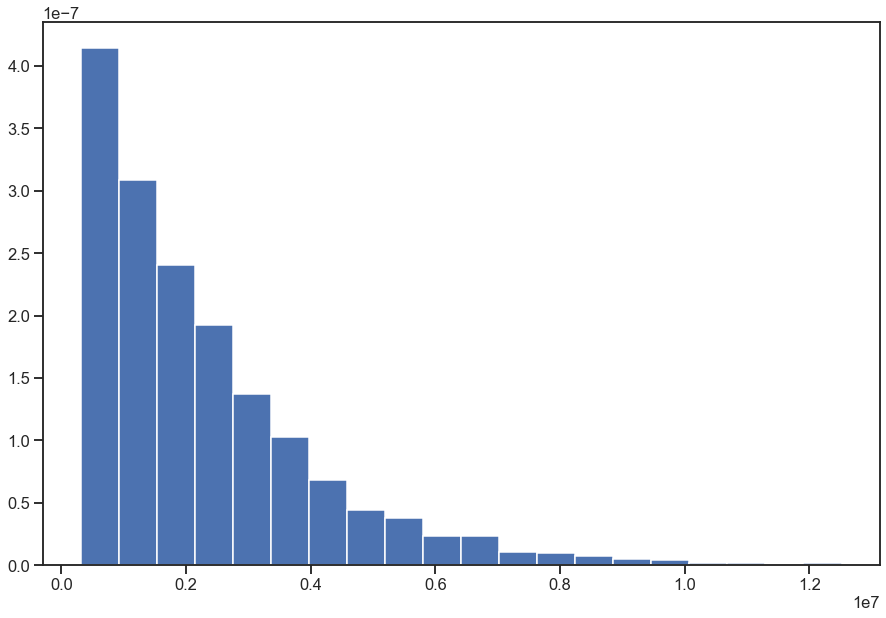

In [83]:

plt.figure(figsize=(15,10))

ax = plt.hist(df.precio, bins=20)

#ax = sns.distplot(a=df.precio)